# Laboratorium 8 - Page Rank (Wojciech Kosztyła)

___

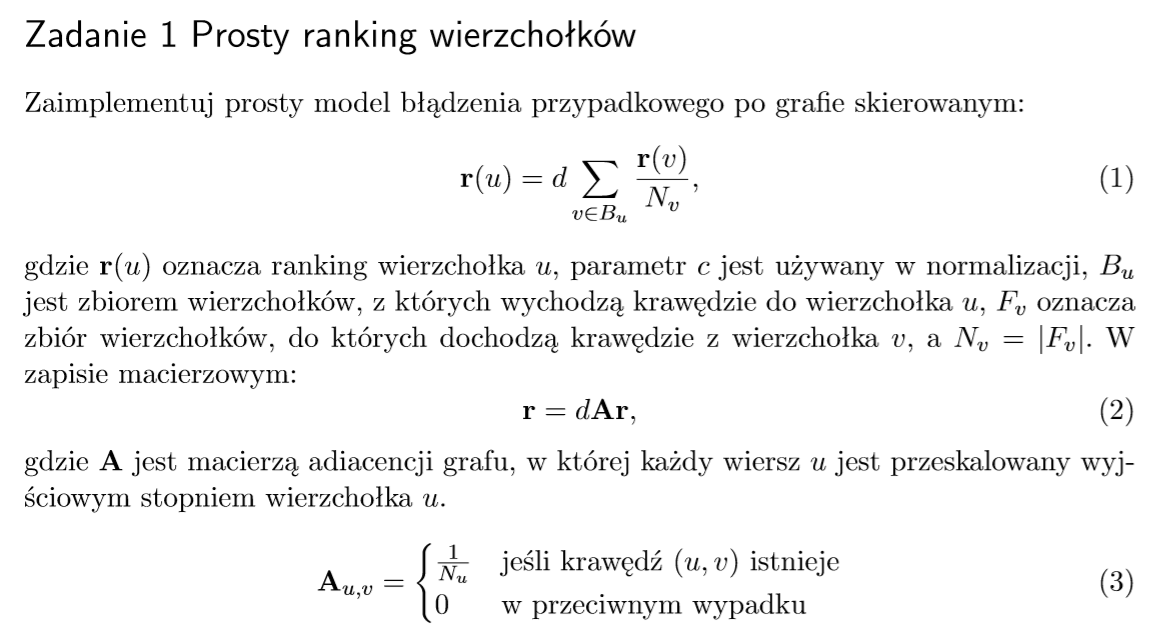
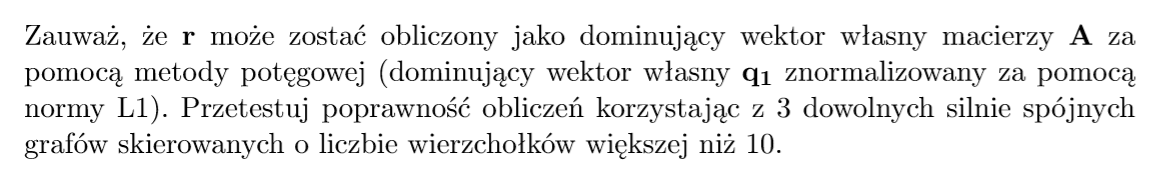

___


In [52]:
import sys
!{sys.executable} -m pip install networkx
!{sys.executable} -m pip install matplotlib

import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np

You should consider upgrading via the 'c:\users\wojciech\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\wojciech\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


Rozpocząłem od stworzenia funkcji generujących losowy silnie spójny graf skierowany.

In [53]:
def create_random_directed_graph(nodes, edges):
    temp_graph = nx.DiGraph()
    temp_graph.add_nodes_from(range(nodes))
    for i in range(edges):

        node_from = random.randint(0, nodes-1)
        node_to =   random.randint(0, nodes-1)

        while (node_from, node_to) in temp_graph.edges:
            node_from = random.randint(0, nodes - 1)
            node_to =   random.randint(0, nodes - 1)

        temp_graph.add_edge(node_from, node_to)
    return temp_graph


def create_random_strongly_connected_directed_graph(nodes, min_edges):
    temp_graph = create_random_directed_graph(nodes, min_edges)
    while not nx.is_strongly_connected(temp_graph):

        node_from = random.randint(0, nodes-1)
        node_to = random.randint(0, nodes-1)

        while (node_from, node_to) in temp_graph.edges:
            node_from = random.randint(0, nodes-1)
            node_to = random.randint(0, nodes-1)

        temp_graph.add_edge(node_from, node_to)
    return temp_graph

Napisałem również funkcję, tworzącą i ew. zapisującą graficzną reprezentację grafu.

In [86]:
def show_graph(graph, save=False, name=""):
    filename = "graph-{}__nodes-{}__edges-{}.png".format(name, graph.number_of_nodes(), graph.number_of_edges())

    print("Rozpoczynam generowanie " + filename)
    
    

    fig1, ax1 = plt.subplots(figsize=(20,10))

    ax1.set_title(name)
    nx.draw(graph, pos=nx.circular_layout(graph))
    nx.draw_networkx_labels(graph, pos=nx.circular_layout(graph))

    fig1.show()
    if save:
        fig1.savefig("zad1/plots/" + filename)
        print("Plik " + filename + " został zapisany.")
        pass
    else:
        print("Skończone generowanie " + filename)

Przetestuję teraz generacje grafów jak i ich wyświetlanie.

Rozpoczynam generowanie graph-__nodes-6__edges-12.png
Skończone generowanie graph-__nodes-6__edges-12.png
Rozpoczynam generowanie graph-__nodes-10__edges-41.png
Skończone generowanie graph-__nodes-10__edges-41.png


<ipython-input-86-3a1809c1c454>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


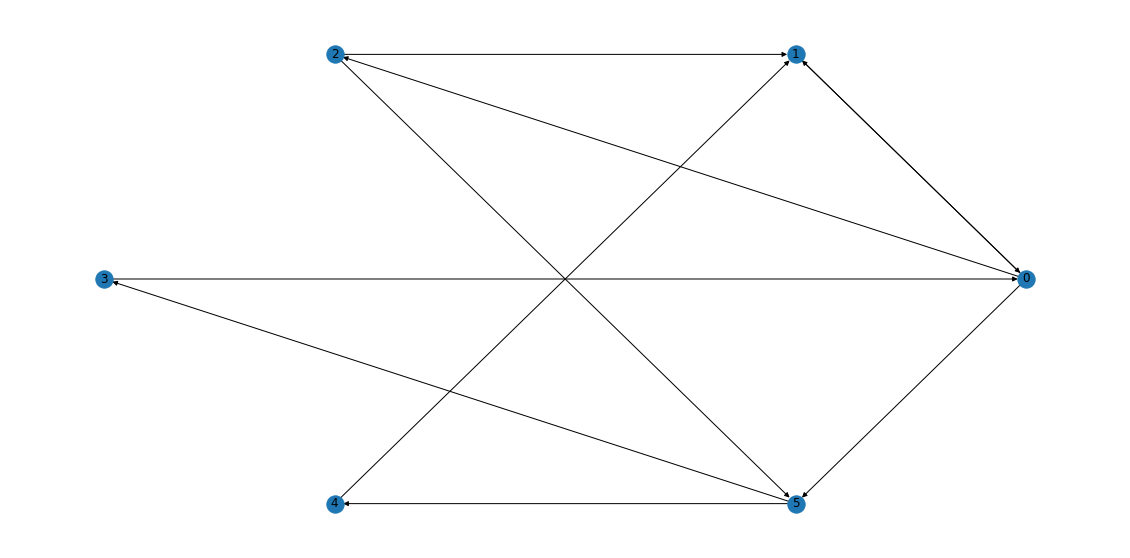

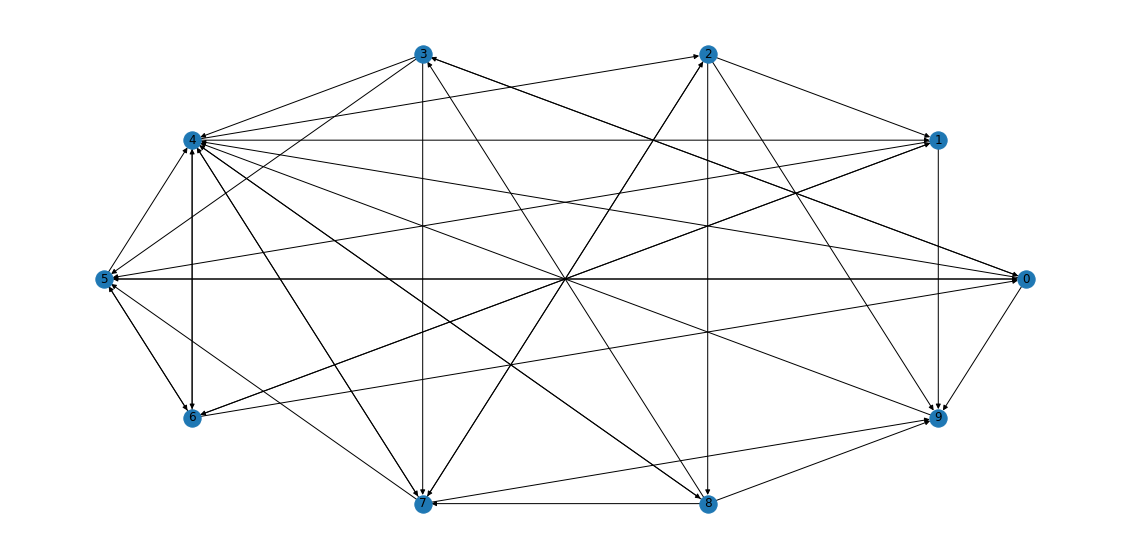

In [87]:
show_graph(create_random_strongly_connected_directed_graph(6, 6))
show_graph(create_random_strongly_connected_directed_graph(10, 6))

Następnie utworzyłem funkcję do tworzenia tej zmodyfikowanej macierzy adjacencji (A_u,v)

In [91]:
def create_adjacency_matrix(graph):
    matrix_A = nx.to_numpy_array(graph)
    for node_a in graph.nodes():
        counter = 0
        for cell in matrix_A[node_a]:
            counter = counter + cell
        matrix_A[node_a] /= counter
    return np.transpose(matrix_A)

[[0.5  0.25 0.   0.  ]
 [0.   0.25 0.5  0.  ]
 [0.5  0.25 0.   1.  ]
 [0.   0.25 0.5  0.  ]]
Rozpoczynam generowanie graph-__nodes-4__edges-9.png
Skończone generowanie graph-__nodes-4__edges-9.png


<ipython-input-86-3a1809c1c454>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


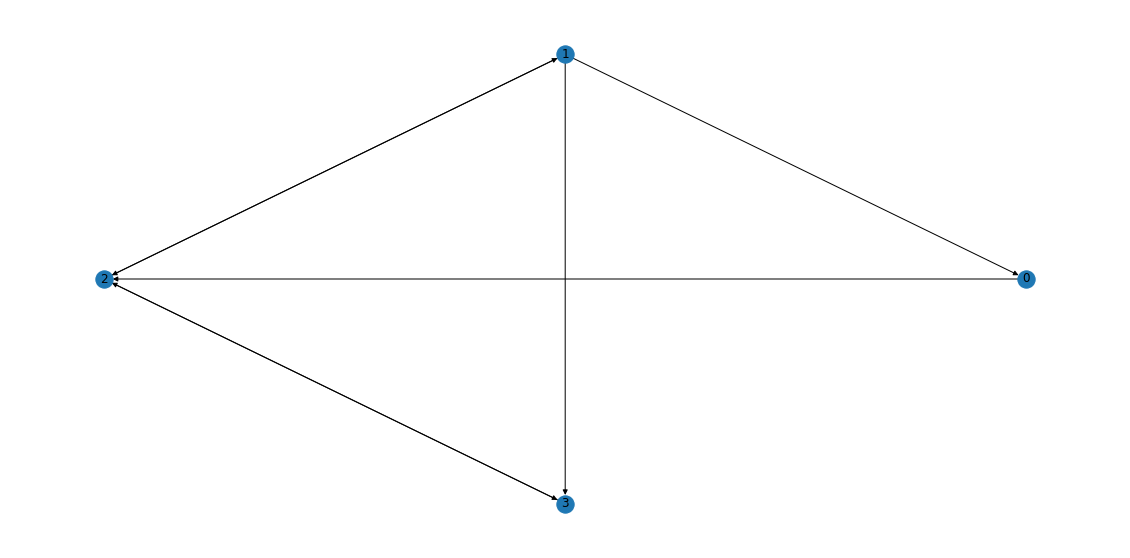

In [92]:
g = create_random_strongly_connected_directed_graph(4,0)
print(create_adjacency_matrix(g))
show_graph(g)

Napisałem funkcję do tworzenia dominującego wektora własnego macierzy (skorzystałem z algorytmu w załączonym do zadania pliku "The PageRank Citation Ranking: Bringing Order to the Web").

In [93]:
def metoda_potegowa__wektor_dom_wlasny(macierz):

    n = len(macierz)
    wektor = np.random.rand(n, 1)
    roznica = 99999 #jakaś duża liczba

    for _ in range(100000):
        while roznica > 0.00000000001:
            wektor_next = macierz @ wektor
            wektor_next = wektor_next / np.linalg.norm(wektor_next, ord=1)
            roznica = np.linalg.norm(wektor - wektor_next, ord=1)
    
            wektor = wektor_next

    return wektor

In [ ]:
metoda_potegowa__wektor_dom_wlasny(create_adjacency_matrix(create_random_directed_graph(3,4)))

Przy zaimplementowanej metodzie potęgowej wystarczy napisać prostą funkcję

In [95]:
def simple_page_rank(graph):
    temp_adjacency_matrix = create_adjacency_matrix(graph)
    temp_vector = metoda_potegowa__wektor_dom_wlasny(temp_adjacency_matrix)
    return temp_vector

In [97]:
temp1_simple_page_rank = simple_page_rank(create_random_strongly_connected_directed_graph(10,0))
temp2_simple_page_rank = simple_page_rank(create_random_strongly_connected_directed_graph(20,0))
temp3_simple_page_rank = simple_page_rank(create_random_strongly_connected_directed_graph(30,0))

print(np.linalg.norm(temp1_simple_page_rank, ord=1))
print(np.linalg.norm(temp2_simple_page_rank, ord=1))
print(np.linalg.norm(temp3_simple_page_rank, ord=1))

print("---")

temp4_simple_page_rank = simple_page_rank(create_random_directed_graph(10,20)) #dodatkowy test do niekoniecznie silnie spójnego grafu
print(np.linalg.norm(temp4_simple_page_rank, ord=1))

1.0
1.0
1.0
---
1.0


Wartości norm wynoszą w przybliżeniu 1, więc zakładam że algorytm działa jak należy (suma rankingów wszystkich wierzchołków jest unormowana).

Z powodu, że generowane przeze mnie grafy mają całkowicie losowo generowane krawędzie,
simple_page_rank() często zwraca wektory, które mają takie same wartości w każdym z wierzchołków (np. [0.25, 0.25, 0.25, 0.25]).

Postanowiłem stworzyć jeden graf ręcznie. (poniżej)

In [98]:
def create_template1_graph():
    temp_graph = nx.DiGraph()
    temp_graph.add_nodes_from(range(5))
    temp_graph.add_edge(0, 1)
    temp_graph.add_edge(1, 2)
    temp_graph.add_edge(2, 3)
    temp_graph.add_edge(2, 4)
    temp_graph.add_edge(3, 0)
    temp_graph.add_edge(4, 0)
    return temp_graph

In [ ]:
temp_graf = create_template1_graph()
print(simple_page_rank(temp_graf))
print(np.linalg.norm(simple_page_rank(temp_graf), ord=1))
show_graph(temp_graf)

In [ ]:
G = nx.DiGraph()
G.add_nodes_from([0,1,2])
G.add_edge(0,1)
G.add_edge(1,2)
G.add_edge(2,0)
G.add_edge(0,2)

print(simple_page_rank(G))
show_graph(G)